In [11]:
import numpy as np
from pyuvdata import UVData
import matplotlib.pyplot as plt
import h5py
import os
cmap = plt.get_cmap('inferno')
indices = np.linspace(0, cmap.N, 6)
my_colors = [cmap(int(i)) for i in indices]

In [12]:
datafile = os.path.join(os.getcwd(), '1131733552_mini_vv_corr_300320.uvh5')

In [26]:
# load in mwa data
uv = UVData()
uv.read(datafile)
autos = uv.select(ant_str='autos', inplace=False)
freqs = uv.freq_array[0, :] * 1e-6

In [27]:
print(uv.get_ants())
(uv.get_baseline_nums()[0:10])
print(uv.get_antpairs()[0:10])
print(uv.get_antpairpols()[0:5])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]
[(0, 0, 'xx'), (0, 0, 'yy'), (0, 0, 'xy'), (0, 0, 'yx'), (0, 1, 'xx')]


(8256, 1, 768, 4)
1
768
69635


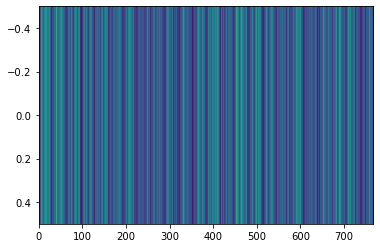

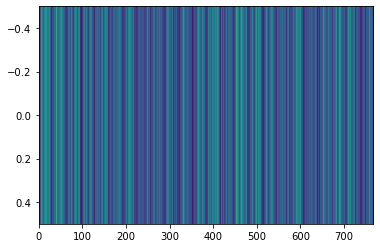

In [31]:
print(uv.data_array.shape)

print(uv.Ntimes)

print(uv.Nfreqs)

bl = uv.antnums_to_baseline(1, 2)
print(bl)

bl_ind = np.where(uv.baseline_array == bl)[0]

 # Amplitude waterfall for all spectral channels and 0th polarization
plt.imshow(np.abs(uv.data_array[bl_ind, 0, :, 0]),aspect='auto') 
plt.show() 

# Update: With new UI features, making waterfalls is easier than ever!
plt.imshow(np.abs(uv.get_data((1, 2, uv.polarization_array[0]))),aspect='auto') 
plt.show() 

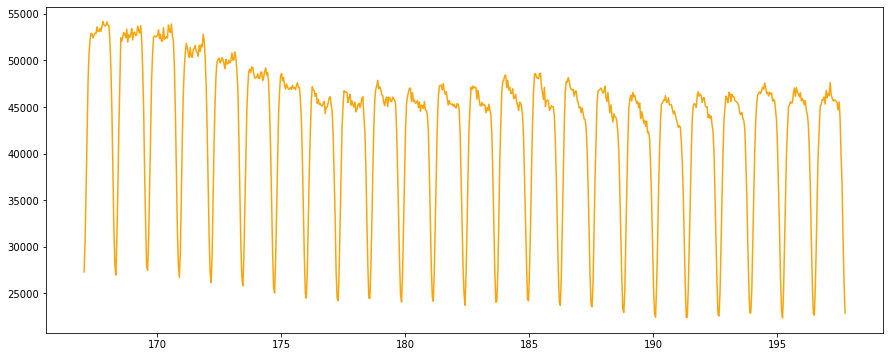

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (15, 6))
ax.plot(freqs, autos.data_array[0, 0, :, 0].real, color=my_colors[4])
plt.show()
plt.close()

In [4]:
# load in coarse band shape
cb_file = os.path.join(os.getcwd(), 'MWA_rev_cb_10khz_doubles.h5')
with h5py.File(cb_file, 'r') as cb:
    cb_shape = cb['coarse_band'][:]

In [5]:
# frequencies have been averaged by a factor of 4; average the coarse band shape
cb_shape_av = np.mean(cb_shape.reshape(32, 4), axis=-1)

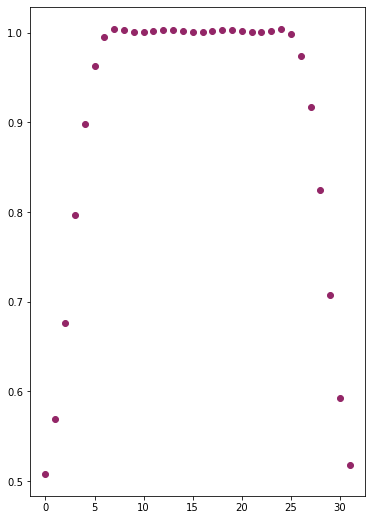

In [6]:
# look at coarse band shape
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (6, 9))
ax.scatter(np.arange(32), cb_shape_av, color = my_colors[2])
plt.show()
plt.close()

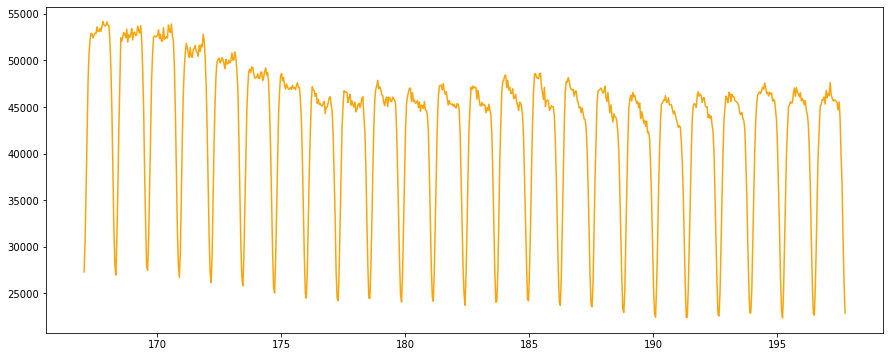

In [7]:
# look at zeroeth xx auto
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (15, 6))
ax.plot(freqs, autos.data_array[0, 0, :, 0].real, color=my_colors[4])
plt.show()
plt.close()

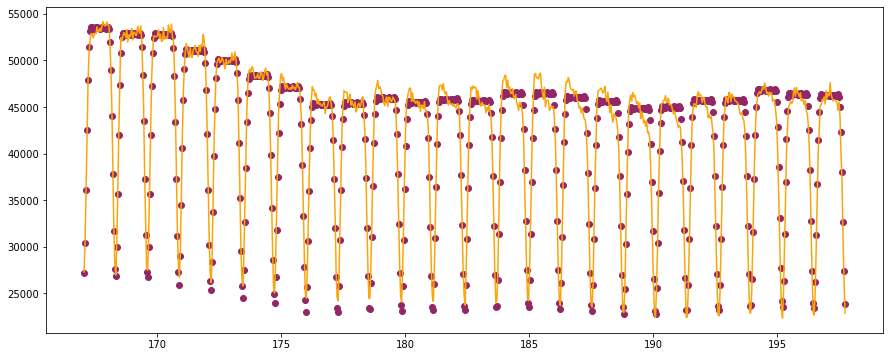

In [8]:
# actual coarse band should approximately equal mean of center channels times cb_shape
means = np.mean(autos.data_array[0, 0, :, 0].real.reshape(24, 32)[:, 11:22], axis=-1)
cb_approx = means[:, np.newaxis] * cb_shape_av
cb_approx = cb_approx.flatten()
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (15, 6))
ax.plot(freqs, autos.data_array[0, 0, :, 0].real, color=my_colors[4])
ax.scatter(freqs, cb_approx, color=my_colors[2])
plt.show()
plt.close()

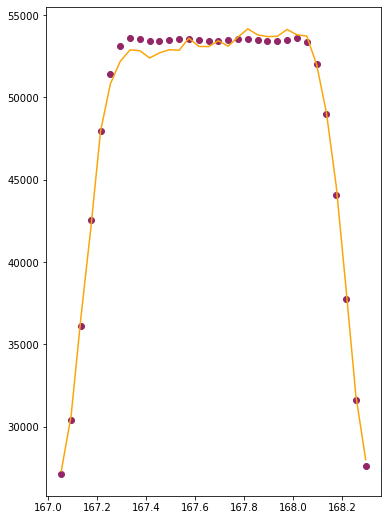

In [9]:
# look at a single coarse channel with approximation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (6, 9))
ax.plot(freqs[0:32], autos.data_array[0, 0, 0:32, 0].real, color=my_colors[4])
ax.scatter(freqs[0:32], cb_approx[0:32], color=my_colors[2])
plt.show()
plt.close()

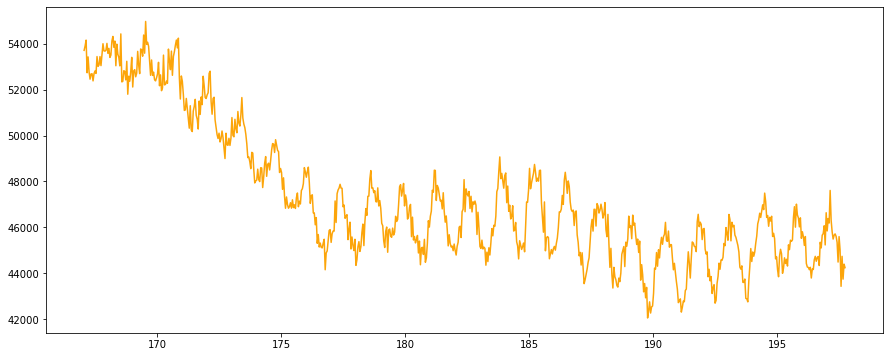

In [10]:
# remove coarse band shape
# we still see periodic structure; this is from the cable reflections
cb_full = np.tile(cb_shape_av, 24)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (15, 6))
ax.plot(freqs, autos.data_array[0, 0, :, 0].real / cb_full, color=my_colors[4])
plt.show()
plt.close()